<a href="https://colab.research.google.com/github/Shan-Lee2k/Image-Processing-and-Computer-Vision/blob/main/Transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARY AND LOAD IMAGES

In [179]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [180]:
!wget -nc https://facts.net/wp-content/uploads/2023/09/23-facts-about-po-kung-fu-panda-1694414879.jpg
!wget -nc https://www.graphicsmill.com/docs/gm5/TransformationsSourceBitmap.jpg
!wget -nc https://i.pinimg.com/736x/66/4f/48/664f48a033892bd77c95b6aaddb0b2e0.jpg

File ‘23-facts-about-po-kung-fu-panda-1694414879.jpg’ already there; not retrieving.

File ‘TransformationsSourceBitmap.jpg’ already there; not retrieving.

File ‘664f48a033892bd77c95b6aaddb0b2e0.jpg’ already there; not retrieving.



In [181]:
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1)
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2)
    plt.title(title_2)
    plt.show()

In [182]:
# Read images
po = cv2.imread("/content/23-facts-about-po-kung-fu-panda-1694414879.jpg")
po = cv2.cvtColor(po, cv2.COLOR_BGR2RGB)

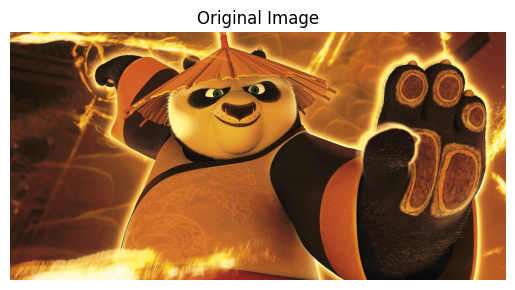

(1000, 2000, 3)

In [183]:
plt.imshow(po)
plt.axis("off")
plt.title("Original Image")
plt.show()
rows, cols, _ = po.shape
po.shape

# DEMO GEOMETRIC TRANSFORMATIONS


1.   **Translation**





In this example, we shift the image 200 pixels horizontally. We also can apply this for vertically by changing t_y value.

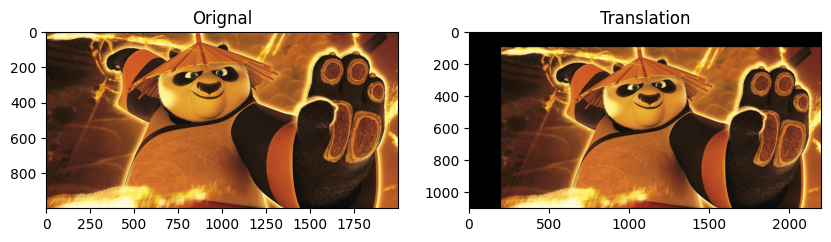



Shape original and after translating ((1000, 2000, 3), (1100, 2200, 3))


In [184]:
# 1. Translation
"""
    - Thực hiện phép dịch ảnh sang phải 200 pixel và xuống dưới 100 pixel.
    - Tăng thêm giá trị pixel cho ảnh output để tránh mất dữ liệu khi dịch ảnh

"""
tx = 200
ty = 100
M = np.float32([[1, 0, tx],
              [0, 1, ty]])
po_translation = cv2.warpAffine(po, M, (cols + tx, rows + ty))
plot_image(po, po_translation,title_1="Orignal",title_2="Translation")
# Shape original and after translating
print("\n")
print(f"Shape original and after translating {po.shape, po_translation.shape}")

**2. Scaling**

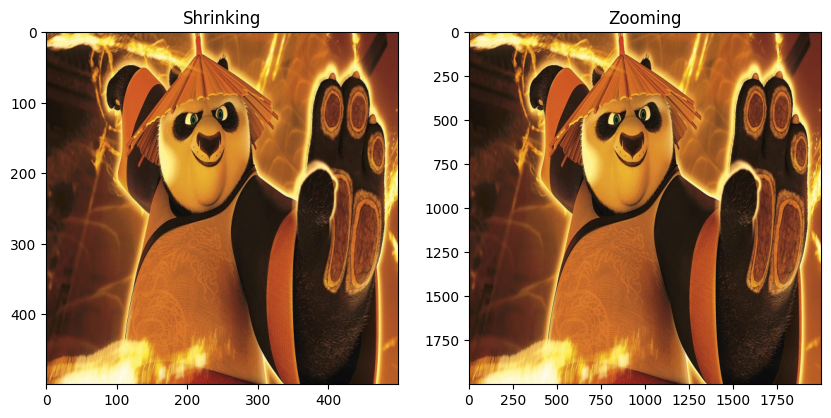



Shape after shrinking and zooming ((500, 500, 3), (2000, 2000, 3))


In [185]:
shrink = (500,500)
zoom = (2000,2000)
po_shrink = cv2.resize(po, shrink, interpolation = cv2.INTER_AREA)
po_zoom = cv2.resize(po, zoom, interpolation = cv2.INTER_LINEAR)
plot_image(po_shrink, po_zoom,title_1="Shrinking",title_2="Zooming")
print("\n")
print(f"Shape after shrinking and zooming {po_shrink.shape, po_zoom.shape}")

Vì tính hàm plot_image được định nghĩa figsize = (10,10) nên ta thấy 2 hình sau khi Scaling có vẻ như nhau nhưng thực ra khi nhìn vào kích thước của 2 ảnh ta thấy ảnh sau khi co lại có kích thước (500,500) và ảnh sau khi Zoom có kích thước (2000,2000)


**3. Rotation**

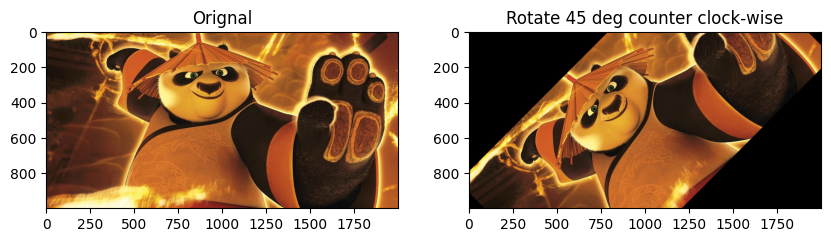

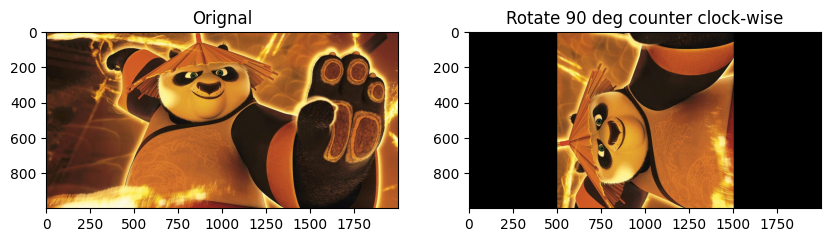

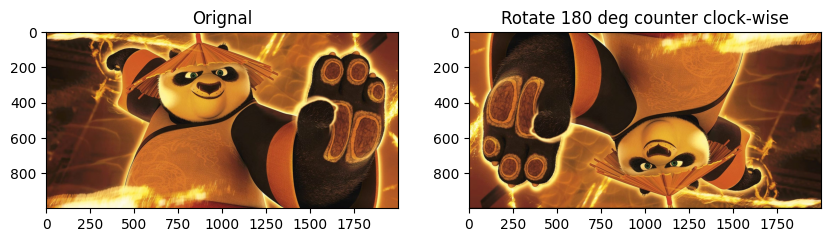

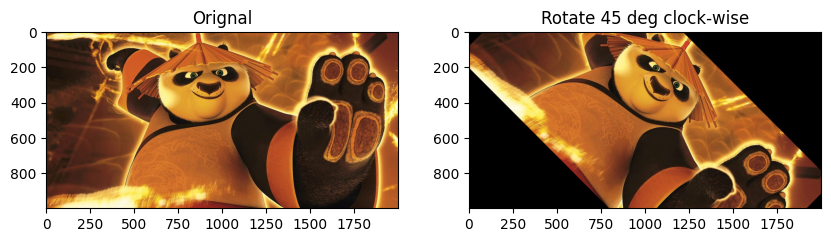

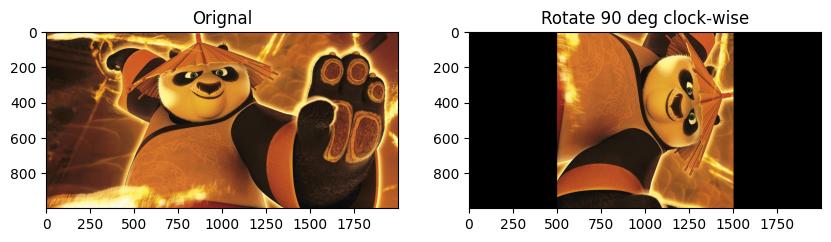

In [186]:
# Define center point of original image
center = (cols // 2 -1, rows // 2 -1)
theta = [45,90,180,-45,-90]
title_rotate = ["Rotate 45 deg counter clock-wise",
                "Rotate 90 deg counter clock-wise",
                "Rotate 180 deg counter clock-wise",
                "Rotate 45 deg clock-wise",
                "Rotate 90 deg clock-wise",
                ]
for i in range(len(theta)):
  M = cv2.getRotationMatrix2D(center, angle=theta[i], scale=1)
  new_img = cv2.warpAffine(po, M, (cols, rows))
  plot_image(po, new_img,title_1="Orignal",title_2=title_rotate[i])
  plt.show()


# AFFINE AND PROJECTIVE TRANSFORMATION

In [187]:
wall = cv2.imread("/content/TransformationsSourceBitmap.jpg")
wall = cv2.cvtColor(wall, cv2.COLOR_BGR2RGB)

**AFFINE TRANSFORMATION**

Shape of wall img: (263, 350, 3)
Transformation matrix:
 [[ 1.06666667 -0.2        15.66666667]
 [ 0.06666667  0.8        15.66666667]]


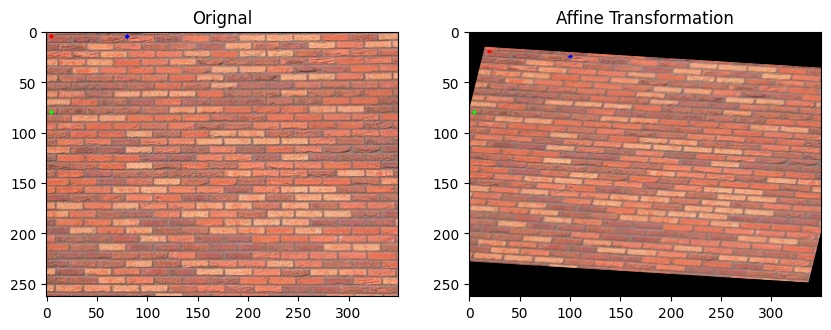

In [188]:
print(f"Shape of wall img: {wall.shape}")
wall = cv2.circle(wall, (5,5), radius=0, color=(255, 0, 0), thickness=4)
wall = cv2.circle(wall, (5,80), radius=0, color=(0, 255, 0), thickness=4)
wall = cv2.circle(wall, (80,5), radius=0, color=(0, 0, 255), thickness=4)
rows_wall, cols_wall, _ = wall.shape
pts1 = np.float32([[5,5],[5,80],[80,5]])
pts2 = np.float32([[20,20],[5,80],[100,25]])
M = cv2.getAffineTransform(pts1,pts2)
print(f"Transformation matrix:\n {M}")
out_affine = cv2.warpAffine(wall,M,(cols_wall,rows_wall))
# out_affine = cv2.circle(out_affine, (20,20), radius=0, color=(255, 0, 0), thickness=4)
# out_affine = cv2.circle(out_affine, (5,80), radius=0, color=(0, 255, 0), thickness=4)
# out_affine = cv2.circle(out_affine, (100,25), radius=0, color=(0, 0, 255), thickness=4)
plot_image(wall,out_affine, title_2= "Affine Transformation" )

**Projective Transformations**

Projective matrix: 
[[ 1.49857823  0.          0.        ]
 [ 0.37535817  1.          0.        ]
 [ 0.00284354 -0.          1.        ]]




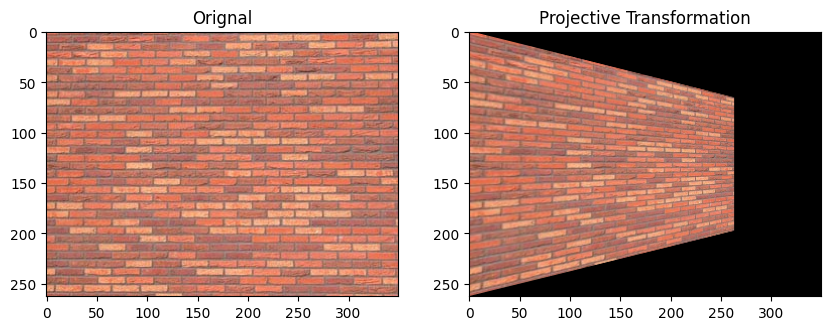

In [189]:
wall = cv2.imread("/content/TransformationsSourceBitmap.jpg")
wall = cv2.cvtColor(wall, cv2.COLOR_BGR2RGB)

pt1 = np.float32([[0,0],[0,rows_wall -1],[cols_wall - 1,0],[cols_wall - 1,rows_wall -1]])
pt2 = np.float32([[0,0],[0,rows_wall -1],[cols_wall * 0.75,rows_wall * 0.25],[cols_wall * 0.75,rows_wall * 0.75]])

# Compute projective transformation and apply it
M = cv2.getPerspectiveTransform(pt1,pt2)
print(f"Projective matrix: \n{M}")
out_projective = cv2.warpPerspective(wall,M,(cols_wall, rows_wall))

# Plot image
print("\n")
plot_image(wall, out_projective, title_2 = "Projective Transformation")


**Compare between two transformations**

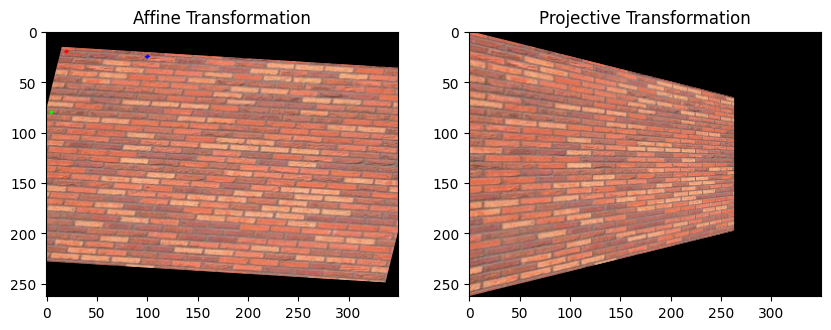

In [190]:
plot_image(out_affine, out_projective, "Affine Transformation","Projective Transformation")